 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Assignment 3 - Javier Aramayo
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

whale_csv_path = Path('../FTbootC_Mod4_Hmwk/whale_returns.csv')
whale_df = pd.read_csv(whale_csv_path)

# Set the date as teh index to the Dataframe
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
whale_df = whale_df.set_index(['Date'])
# Sort datetime index in ascending order (past to present)
whale_df.sort_index(inplace=True)

whale_df.head()
#whale_df.tail()
    # Daily returns for 4 tickers, returns in float64, date starts on 2015-03-02, ending 2019-05-01



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# checking the data types
whale_df.dtypes


SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()

In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns

algo_csv_path = Path('../FTbootC_Mod4_Hmwk/algo_returns.csv')

# Read the CSVs into DataFrames

algo_df = pd.read_csv(algo_csv_path)

# Set the date as teh index to the Dataframe
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df = algo_df.set_index(['Date'])

# Sort datetime index in ascending order (past to present)
algo_df.sort_index(inplace=True)

algo_df.head(10)
#algo_df.tail()
    # Daily returns for two Algos, returns in float64, date starts on 2014-05-28 Algo1, 2014-06-05 Algo2
    # ending date is 2019-05-01 for both algos

# checking the data types
#algo_df.dtypes


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls

algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sptsx60_csv_path = Path('../FTbootC_Mod4_Hmwk/sp_tsx_history.csv')
sptsx60_df = pd.read_csv(sptsx60_csv_path)

# Set the date as teh index to the Dataframe
#sptsx60_df = sptsx60_df.set_index(['Date'])

# Sort datetime index in ascending order (past to present)
#sptsx60_df.sort_index(inplace=True)

sptsx60_df.head()
#sptsx60_df.tail()
    # Closing price data in object data type with $ sign, the date format is 1-oct-2012, ending 30-dec-2019
#sptsx60_df.isnull().sum()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [11]:
# Check Data Types
sptsx60_df.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sptsx60_dfV2 = sptsx60_df.copy()
sptsx60_dfV2['Date'] = pd.to_datetime(sptsx60_dfV2['Date'])
sptsx60_dfV2 = sptsx60_dfV2.set_index(['Date'])
#sptsx60_df.head()
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].str.replace("$", "")
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].str.replace(",", "")
#sptsx60_df.head()
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].astype('float')

sptsx60_dfV2.dtypes

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [13]:
sptsx60_dfV2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
# Calculate Daily Returns
d_returns_tsx60 = sptsx60_dfV2.pct_change()
d_returns_tsx60.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
d_returns_tsx60.isnull().sum()
d_returns_tsx60 = d_returns_tsx60.dropna().copy()

In [16]:
d_returns_tsx60.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
d_returns_tsx60 = d_returns_tsx60.rename(columns={"Close": "SP_TSX60"})
d_returns_tsx60.head()

,SP_TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_WAT = pd.concat([whale_df, algo_df, d_returns_tsx60], axis="columns", join="inner")

combined_WAT.head(10)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


In [19]:
whale_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1059, freq=None)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

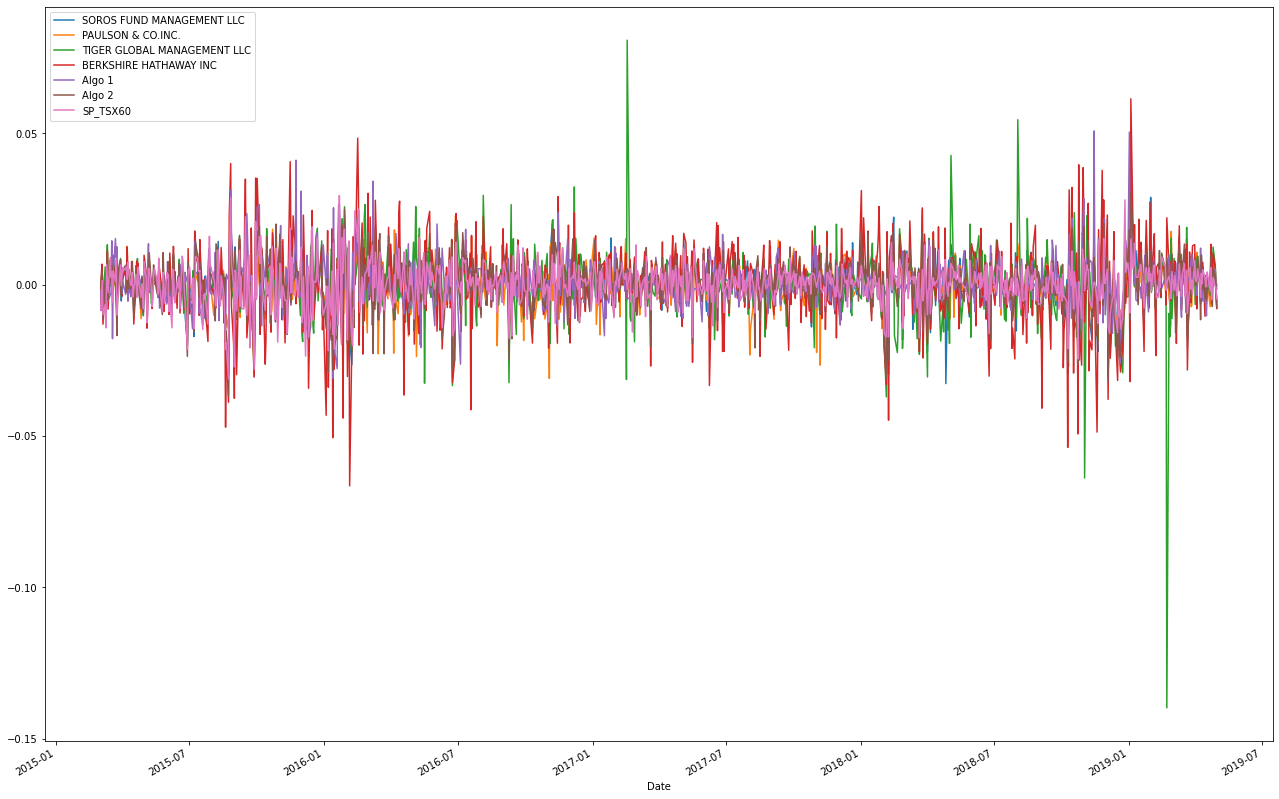

In [26]:
# Plot daily returns of all portfolios
combined_WAT.plot(figsize = (22, 15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

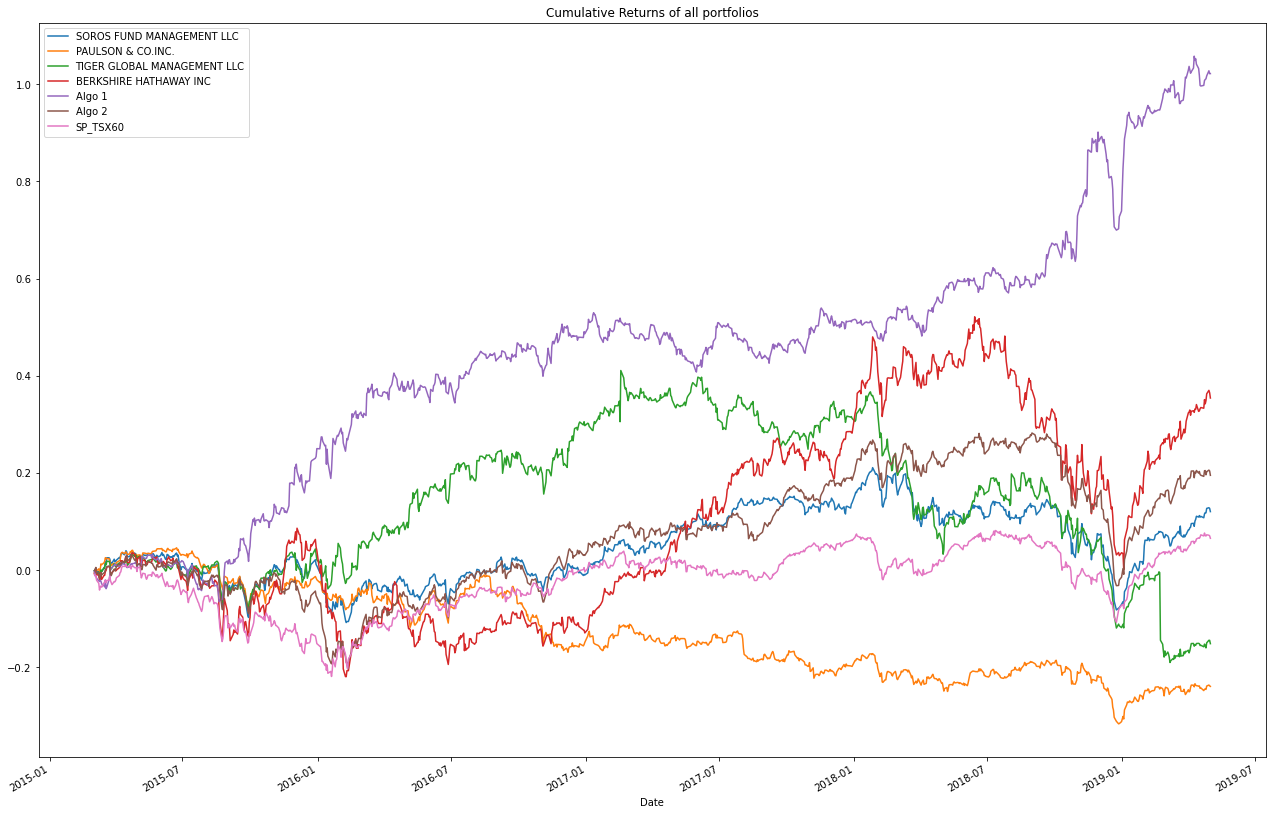

In [24]:
# Calculate cumulative returns of all portfolios

cumu_combined_WAT = (1 + combined_WAT).cumprod() - 1
cumu_combined_WAT

# Plot cumulative returns

cumu_combined_WAT.plot(figsize = (22, 15), title="Cumulative Returns of all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis - Cumulative Returns'}>

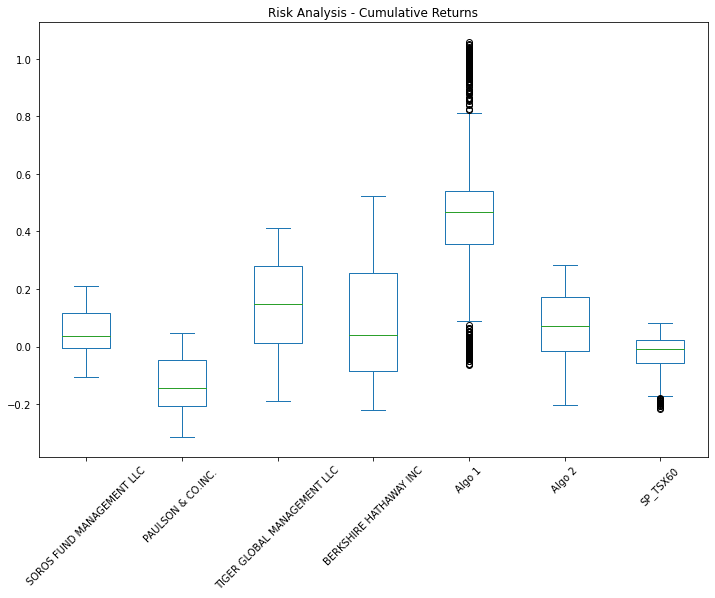

In [29]:
# Box plot to visually show risk
cumu_combined_WAT.plot.box(figsize = (12, 8), title="Risk Analysis - Cumulative Returns", rot=45)

<AxesSubplot:title={'center':'Risk Analysis - Daily Returns'}>

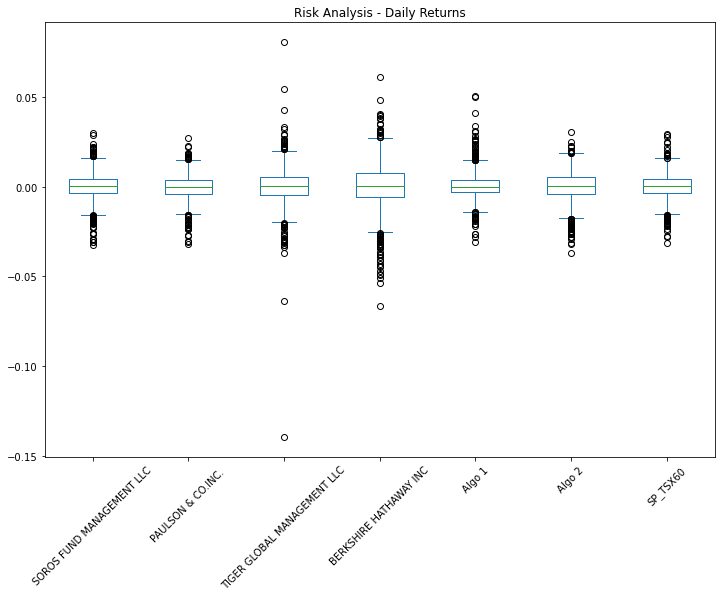

In [28]:
# Box plot to visually show risk
combined_WAT.plot.box(figsize = (12, 8), title="Risk Analysis - Daily Returns", rot=45)

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_WAT.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX60                       0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [35]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std = combined_WAT.std()
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values()
daily_std

#Answer: All the portfolios but Paulson & CO.INC. are riskier(more volatile) than the SP_TSX60,
# because their standard deviations are higher than of the SP-TSX60

PAULSON & CO.INC.              0.006982
SP_TSX60                       0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized standard deviation (252 trading days)
annual_daily_std = combined_WAT.std() * np.sqrt(252)
annual_daily_std = annual_daily_std.sort_values()
annual_daily_std

PAULSON & CO.INC.              0.110841
SP_TSX60                       0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day Rolling std, daily returns'}, xlabel='Date'>

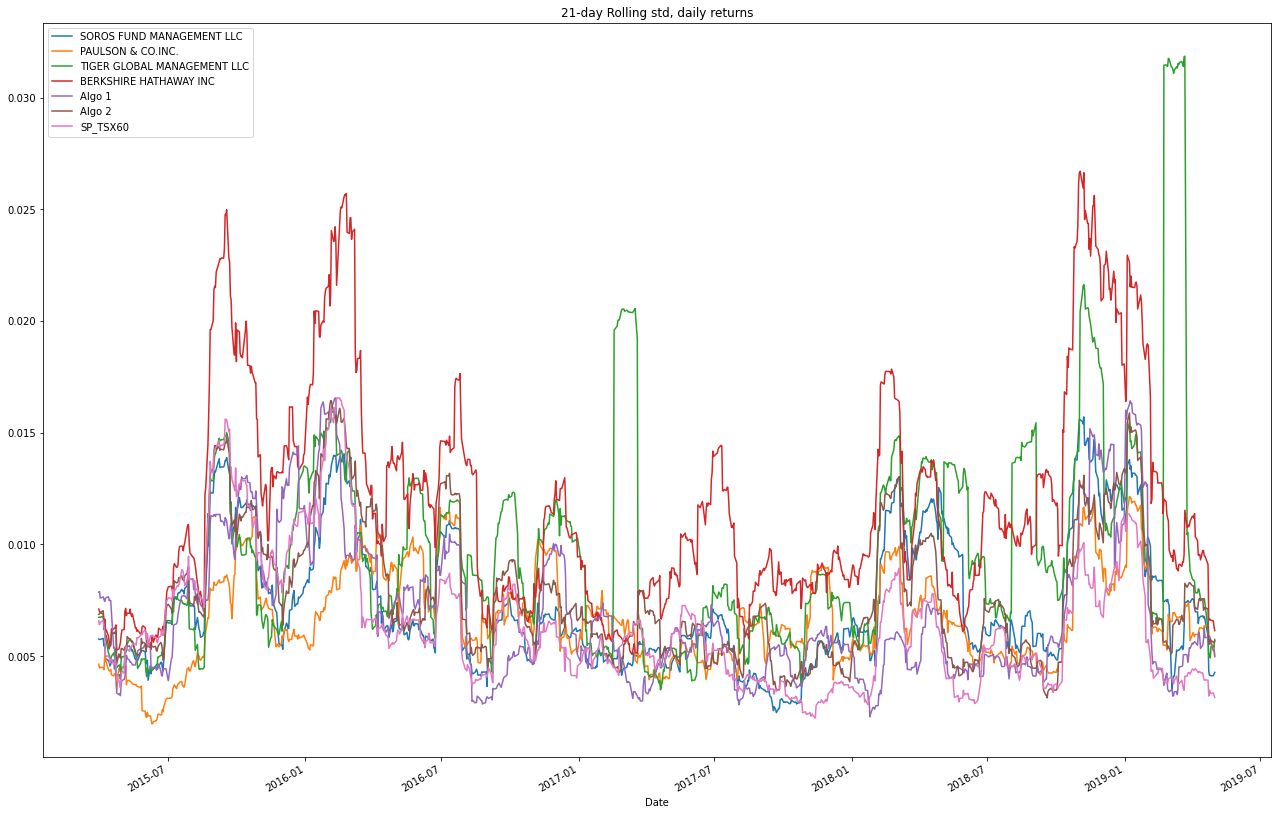

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_roll_21 = combined_WAT.rolling(window=21).std()
std_roll_21

# Plot the rolling standard deviation
std_roll_21.plot(figsize = (22, 15), title="21-day Rolling std, daily returns")

### Calculate and plot the correlation

In [44]:
# Calculate the correlation
correlation_all_portf = combined_WAT.corr()
# Display de correlation matrix
correlation_all_portf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [121]:
s

Berkshire H. INC covariance: 5.027336077110013e-05
S&P TSX60 variance: 4.9479515915131015e-05
Berkshire H. INC Beta: 1.0160439091063613


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [65]:
# Use `ewm` to calculate the rolling window
ewm_roll_21 = combined_WAT.ewm(com=0)
ewm_roll_21

ExponentialMovingWindow [com=0,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (combined_WAT.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios_all

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
SOROS FUND MANAGEMENT LLC      0.286709
SP_TSX60                       0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios all portfolios'}>

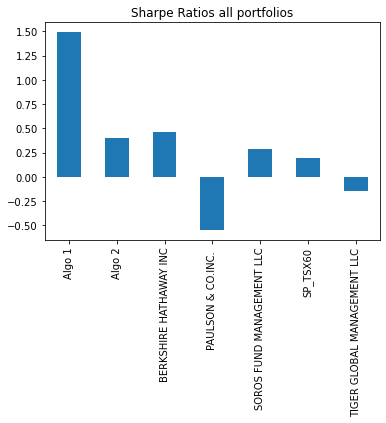

In [73]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot.bar(title="Sharpe Ratios all portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

--- Answer: When considering the sharpe ratio; the two algorithms(Algo1, Algo2) outperformed the S&P TSX 60. The Algo1 outperformed all of the whales portofiols, and Algo 2 outperformed all but one portfolio - The Berkshire Hathaway.   

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [91]:
# Reading data from 1st stock
tsla_csv_path = Path('../FTbootC_Mod4_Hmwk/TSLAdata.csv')
tsla_df = pd.read_csv(tsla_csv_path)

# Fix Data Types
#tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df["Date"] = tsla_df["Date"].str.replace(" 16:00:00", "")
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df = tsla_df.set_index(['Date'])


#sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].astype('float')

#tsla_df.dtypes

tsla_df.head()

,TSLA
Date,
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78
2015-03-09,38.18


In [92]:
# Reading data from 2nd stock
jpm_csv_path = Path('../FTbootC_Mod4_Hmwk/JPMorgandata.csv')
jpm_df = pd.read_csv(jpm_csv_path)
jpm_df["Date"] = jpm_df["Date"].str.replace(" 16:00:00", "")
jpm_df['Date'] = pd.to_datetime(jpm_df['Date'])
jpm_df = jpm_df.set_index(['Date'])

jpm_df.head()

,JPM
Date,
2015-03-03,61.97
2015-03-04,62.13
2015-03-05,62.00
2015-03-06,60.89
2015-03-09,61.50


In [93]:
# Reading data from 3rd stock
wmt_csv_path = Path('../FTbootC_Mod4_Hmwk/WMTdata.csv')
wmt_df = pd.read_csv(wmt_csv_path)
wmt_df["Date"] = wmt_df["Date"].str.replace(" 16:00:00", "")
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
wmt_df = wmt_df.set_index(['Date'])

wmt_df.head()

,WMT
Date,
2015-03-03,83.37
2015-03-04,82.58
2015-03-05,83.57
2015-03-06,82.59
2015-03-09,82.88


In [94]:
# Combine all stocks in a single DataFrame
my_portf = pd.concat([tsla_df, jpm_df, wmt_df], axis="columns", join="inner")
my_portf

,TSLA,JPM,WMT
Date,,,
2015-03-03,39.91,61.97,83.37
2015-03-04,40.49,62.13,82.58
2015-03-05,40.13,62.00,83.57
2015-03-06,38.78,60.89,82.59
2015-03-09,38.18,61.50,82.88
...,...,...,...
2019-04-24,51.73,113.55,103.53
2019-04-25,49.53,113.61,103.52
2019-04-26,47.03,114.47,101.53


In [96]:
# Reset Date index
my_portf = pd.concat([tsla_df, jpm_df, wmt_df], axis="columns", join="inner")
my_portf
# Sort datetime index in ascending order (past to present)
#whale_df.sort_index(inplace=True)

#whale_df.head()

,TSLA,JPM,WMT
Date,,,
2015-03-03,39.91,61.97,83.37
2015-03-04,40.49,62.13,82.58
2015-03-05,40.13,62.00,83.57
2015-03-06,38.78,60.89,82.59
2015-03-09,38.18,61.50,82.88
...,...,...,...
2019-04-24,51.73,113.55,103.53
2019-04-25,49.53,113.61,103.52
2019-04-26,47.03,114.47,101.53


In [97]:
# Reorganize portfolio data by having a column per symbol
my_portf = pd.concat([tsla_df, jpm_df, wmt_df], axis="columns", join="inner")
my_portf

,TSLA,JPM,WMT
Date,,,
2015-03-03,39.91,61.97,83.37
2015-03-04,40.49,62.13,82.58
2015-03-05,40.13,62.00,83.57
2015-03-06,38.78,60.89,82.59
2015-03-09,38.18,61.50,82.88
...,...,...,...
2019-04-24,51.73,113.55,103.53
2019-04-25,49.53,113.61,103.52
2019-04-26,47.03,114.47,101.53


In [100]:
# Calculate daily returns
d_returns_myportf = my_portf.pct_change()

# Drop NAs
d_returns_myportf = d_returns_myportf.dropna().copy()

# Display sample data
d_returns_myportf

,TSLA,JPM,WMT
Date,,,
2015-03-04,0.014533,0.002582,-0.009476
2015-03-05,-0.008891,-0.002092,0.011988
2015-03-06,-0.033641,-0.017903,-0.011727
2015-03-09,-0.015472,0.010018,0.003511
2015-03-10,-0.003143,-0.025041,-0.009773
...,...,...,...
2019-04-24,-0.019894,-0.001670,0.004463
2019-04-25,-0.042529,0.000528,-0.000097
2019-04-26,-0.050474,0.007570,-0.019223


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [101]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
d_returns_myportf = d_returns_myportf.dot(weights)

# Display sample data
d_returns_myportf.head()

Date
2015-03-04    0.002546
2015-03-05    0.000335
2015-03-06   -0.021090
2015-03-09   -0.000648
2015-03-10   -0.012652
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [102]:
# Join your returns DataFrame to the original returns DataFrame
all_in_portf = pd.concat([combined_WAT, d_returns_myportf], axis="columns", join="inner")

#combined_WAT = pd.concat([whale_df, algo_df, d_returns_tsx60], axis="columns", join="inner")

In [112]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_in_portf = all_in_portf.dropna().copy()
columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP_TSX60','My_Portf']
all_in_portf.columns = columns
all_in_portf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60,My_Portf
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002546
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.000335
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.021090
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.000648
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.012652
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.005700
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.014032
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.020709


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized `std`
allin_annual_std = all_in_portf.std() * np.sqrt(252)
allin_annual_std = allin_annual_std.sort_values()
allin_annual_std

PAULSON & CO.INC.              0.110988
SP_TSX60                       0.111706
Algo 1                         0.120758
SOROS FUND MANAGEMENT LLC      0.124213
Algo 2                         0.132267
TIGER GLOBAL MANAGEMENT LLC    0.172606
My_Portf                       0.203165
BERKSHIRE HATHAWAY INC         0.203776
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'All in Portfs, 21 roll_Std'}, xlabel='Date'>

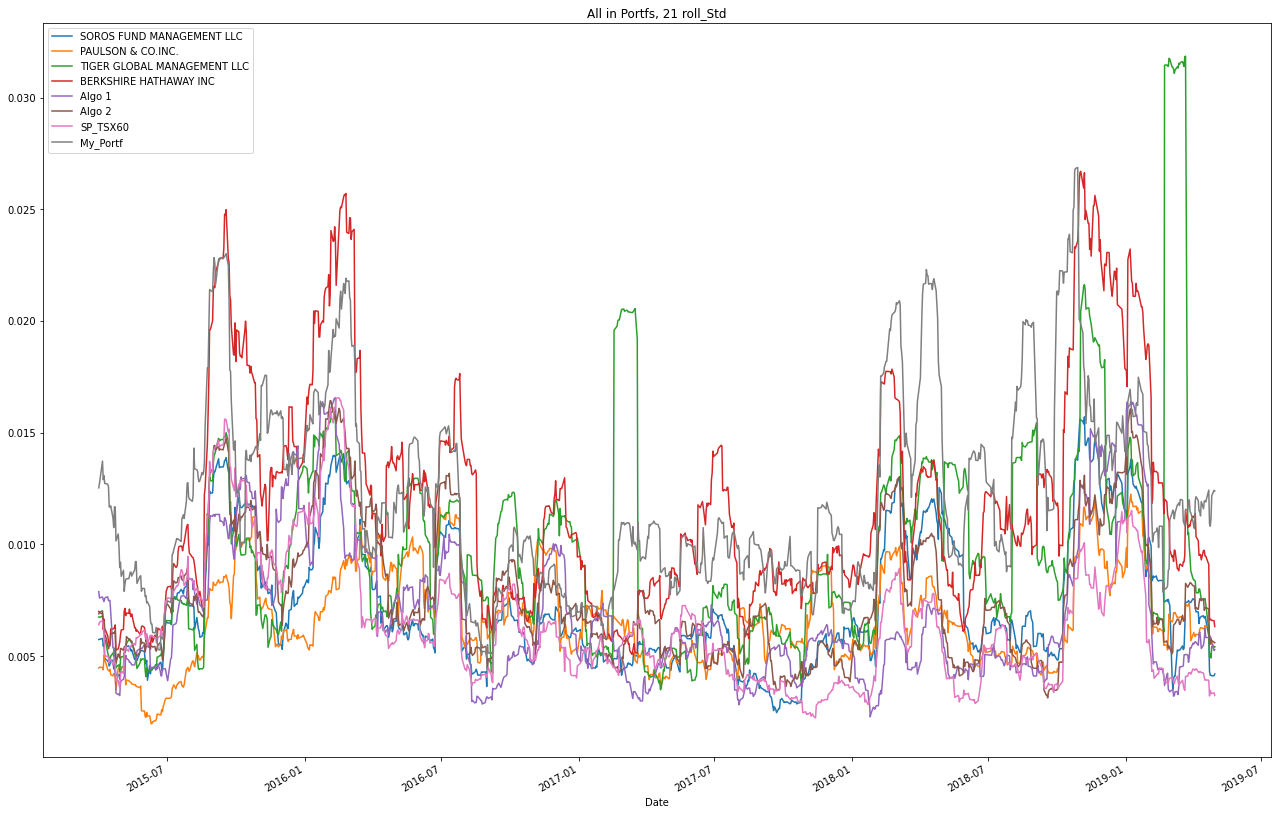

In [116]:
# Calculate rolling standard deviation
allin_std_roll21 = all_in_portf.rolling(window=21).std()

# Plot rolling standard deviation
allin_std_roll21.plot(figsize = (22, 15), title="All in Portfs, 21 roll_Std")


### Calculate and plot the correlation

In [117]:
# Calculate and plot the correlation
correlation_allin_portf = all_in_portf.corr()
# Display de correlation matrix
correlation_allin_portf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60,My_Portf
SOROS FUND MANAGEMENT LLC,1.000000,0.696297,0.557954,0.749955,0.313542,0.826173,0.673475,0.550634
PAULSON & CO.INC.,0.696297,1.000000,0.430989,0.538781,0.265629,0.673603,0.484939,0.414061
TIGER GLOBAL MANAGEMENT LLC,0.557954,0.430989,1.000000,0.421474,0.160234,0.504195,0.438649,0.433471
BERKSHIRE HATHAWAY INC,0.749955,0.538781,0.421474,1.000000,0.288307,0.684527,0.555563,0.520981
Algo 1,0.313542,0.265629,0.160234,0.288307,1.000000,0.285252,0.309268,0.181362
Algo 2,0.826173,0.673603,0.504195,0.684527,0.285252,1.000000,0.737400,0.575757
SP_TSX60,0.673475,0.484939,0.438649,0.555563,0.309268,0.737400,1.000000,0.459655
My_Portf,0.550634,0.414061,0.433471,0.520981,0.181362,0.575757,0.459655,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My Portfolio vs S&P 60 TSC - BETA'}, xlabel='Date'>

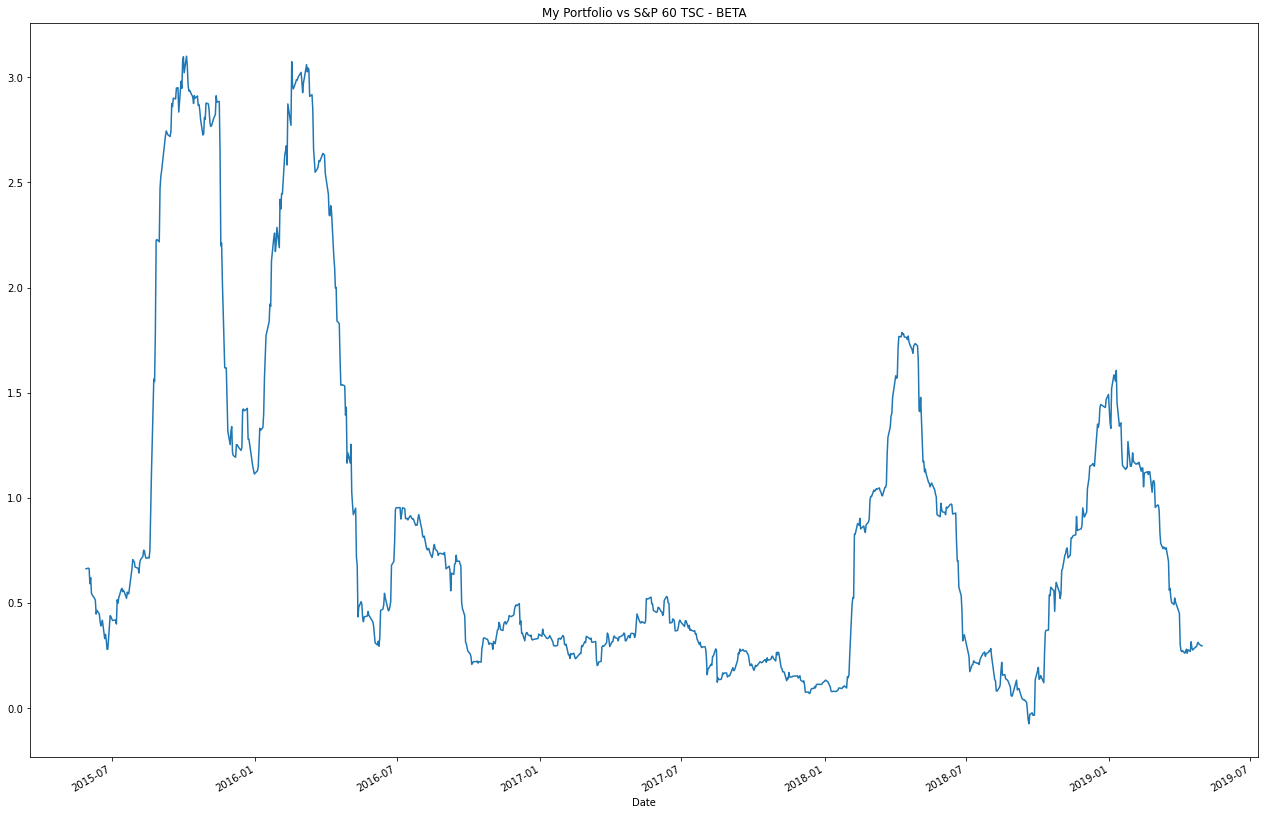

In [123]:
# Calculate and plot Beta
myPortf_covariance = all_in_portf["My_Portf"].rolling(window=60).cov(all_in_portf["SP_TSX60"])
myPortf_variance = all_in_portf["My_Portf"].rolling(window=60).var()
myPortf_beta = myPortf_covariance / spTSX60_variance

# Plot beta trend

myPortf_beta.plot(figsize = (22, 15), title="My Portfolio vs S&P 60 TSC - BETA")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [125]:
# Calculate Annualized Sharpe Ratios
# a) calculate daily std deviations
allin_daily_std = all_in_portf.std()
allin_daily_std = allin_daily_std.sort_values()
# b) calculate Sharpe Ratios
allin_sharpe_ratios = (all_in_portf.mean() * 252) / (allin_daily_std * np.sqrt(252))


<AxesSubplot:title={'center':'All-in Portfolios - Sharpe Ratios'}>

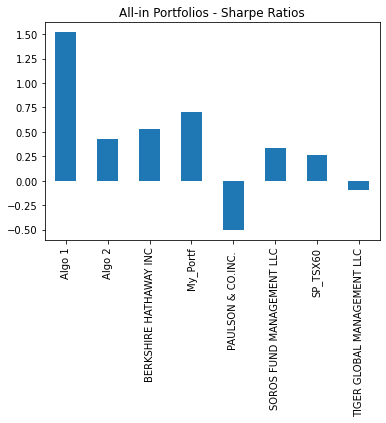

In [126]:
# Visualize the sharpe ratios as a bar plot
allin_sharpe_ratios.plot.bar(title="All-in Portfolios - Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
#Answer: My Portfolio performed better than all the other portfolios but Algo1.